In [6]:
%pylab inline
from datetime import date
from app import create_app
from app.instrument import Instrument
from app.analysis import Quote
mappings= {'BRK.B': 'BRK-B'}
with create_app().app_context():
    provided = ['SPLV']
    quote = Quote([b.symbol if b.symbol not in mappings else mappings[b.symbol]
                   for b in Instrument.find_stocks(200)] + provided, 120)
f'from {quote.start.date()} to {date.today()}'

Populating the interactive namespace from numpy and matplotlib


'from 2019-02-19 to 2019-06-17'

In [7]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 10) & (stat['21-mean'] > 1)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
MCD,62,3.517907,1.495654,2.235081,2.999196
MA,62,4.486252,1.974830,2.183100,5.698715
KO,62,3.710302,1.659844,2.129900,3.383609
WM,62,3.706482,1.876259,1.882194,3.316667
SHOP,62,14.857168,8.798722,1.668671,6.171438
SBUX,62,4.115643,2.726024,1.445564,4.600183
V,62,3.700882,2.480359,1.421521,4.317938
ZNGA,62,6.527105,4.497632,1.412322,6.702619
OKTA,62,12.959719,9.122820,1.401400,9.256045


In [8]:
quote.setup_mask([*stat.index, *provided])
quote.least_correlated_portfolio(21, 3, provided, cr=2, dr=2)

['SPLV', 'MCD', 'MA'] 5.0363728911965815 3.511951926617117 2.528126554260313 -7.043784070558278
['SPLV', 'MCD', 'KO'] 3.823774768492445 3.34207410035357 2.0651053446844507 -6.990584121583597
['SPLV', 'MCD', 'WM'] 3.595690621660923 3.117567253263826 2.0517168928809713 -6.742877670628671
['SPLV', 'MCD', 'SHOP'] 1.6639785655251735 1.473995493830647 2.622671139547676 -6.5293547012314725
['SPLV', 'MCD', 'ZNGA'] 1.2817447391361476 1.0484683079515476 2.7289072378403896 -6.273006352447727
['SPLV', 'MCD', 'ENPH'] 1.2065380087503508 0.9410300591660228 2.763461171279085 -6.202444452139865


['SPLV', 'MCD', 'ENPH']

In [9]:
quote.setup_mask([*stat.index, *provided])
quote.least_correlated_portfolio(21, 3, provided + ['ZNGA'], cr=2, dr=2)

['SPLV', 'ZNGA', 'MCD'] 1.2817447391361476 1.0484683079515476 2.7289072378403896 -6.273006352447727


['SPLV', 'ZNGA', 'MCD']

In [10]:
quote.setup_mask(['ZNGA', 'MCD'])
quote.find_optimal_ratio(21, 8)

     fun: 1.7278377057144922
     jac: array([3.45124498, 3.45640983])
 message: 'Optimization terminated successfully.'
    nfev: 8
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.14218449, 0.85781551])


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


({'ZNGA': 0.14218448750509022, 'MCD': 0.8578155124949097}, 3.9458, 1.3145)

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,62.0,3.939639,1.314989,1.187368,3.142452,3.936182,4.863173,6.266233,2.862867,3.159605
MCD,62.0,3.517907,1.495654,-0.558029,2.765353,3.845786,4.320519,6.412885,2.235081,2.999196
ZNGA,62.0,6.527105,4.497632,-2.808992,3.689753,5.561080,9.872268,17.904763,1.412322,6.702619


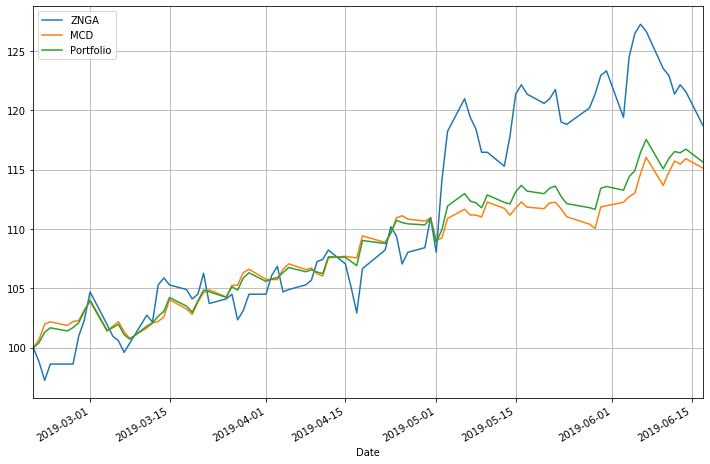

In [11]:
quote.setup_mask(['ZNGA', 'MCD'])
quote.graph(21, {'MCD': 0.85781551, 'ZNGA': 0.14218449})